In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from data import CleanedData
from models import nn
import sklearn.metrics
import torch
import sklearn.metrics
import matplotlib.pyplot as plt


# For Adaboost
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle

# For KNN
from sklearn.neighbors import KNeighborsClassifier

import torch
import numpy as np

from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import recall_score
import pandas as pd
import numpy as np
import torch.nn
import torch
import tqdm
import optuna

In [2]:
data = CleanedData(loc='./data/joined.csv', test_ratio=0.2, impute_data=True, convert_non_numerical=True, normalize_data=True, drop_columns=['source', 'Last_Update','province','country','latitude', 'longitude'])

/opt/miniconda3/envs/cmpt353/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [77]:

def objective(trial):
    global data
    i = 0
    first_layer = trial.suggest_int('first_layer', 20, 250)
    second_layer = trial.suggest_int('second_layer', 1, 200)
    activation_1 = trial.suggest_categorical('activation1', ['relu',])
    activation_2 = trial.suggest_categorical('activation2', ['sigmoid',])
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    acc = 0
    old_recall = np.zeros(4)
    old_overal_recall = np.zeros(4)
    for epoch, (X_train, y_train, X_val, y_val) in enumerate(data.kfold_data):
        train_dataloader = nn.load_data(X_train, y_train)
        val_dataloader = nn.load_data(X_val, y_val, len(y_val), train=False)
        optimizer.zero_grad()
        model = nn.network(first_layer, second_layer, activation_1, activation_2)
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        for i in range(20):
            for batch_idx, (X, y) in enumerate(train_dataloader):
                model.train()
                y_hat = model(X)
                loss = criterion(y_hat, y.long())
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            for val_x, val_y in val_dataloader:
                model.eval()
                y_h = model(val_x)
                overal_recall = recall_score(val_y.numpy(), torch.argmax(torch.softmax(y_h,dim=1), dim=1).numpy(), average=None,zero_division=0)
                old_overal_recall = np.sum([overal_recall, old_overal_recall], axis=0)
                i+=1
            trial.report(old_overal_recall[0]/i, epoch)
            trial.set_user_attr('overall recall', old_overal_recall/i)
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()
    print(old_overal_recall/i)
    return old_overal_recall[0]/i

In [78]:
study = optuna.create_study(sampler=optuna.samplers.TPESampler(),direction="maximize")
study.optimize(objective, n_trials=500)

[I 2020-12-15 00:15:23,396] A new study created in memory with name: no-name-3d1851c0-dd7f-4aef-be16-b8f9d6f57a0a
[I 2020-12-15 00:19:56,452] Trial 0 finished with value: 0.0 and parameters: {'first_layer': 186, 'second_layer': 52, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.08397629924649405}. Best is trial 0 with value: 0.0.


[0. 0. 4. 0.]


[I 2020-12-15 00:24:26,309] Trial 1 finished with value: 0.0 and parameters: {'first_layer': 237, 'second_layer': 48, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 1.0267366558207516e-05}. Best is trial 0 with value: 0.0.


[0.         2.32177456 3.99714225 0.        ]


[I 2020-12-15 00:28:51,861] Trial 2 finished with value: 0.0 and parameters: {'first_layer': 141, 'second_layer': 48, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.02416859009435577}. Best is trial 0 with value: 0.0.


[0. 0. 4. 0.]


[I 2020-12-15 00:33:22,594] Trial 3 finished with value: 0.0 and parameters: {'first_layer': 38, 'second_layer': 155, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.004195554958135327}. Best is trial 0 with value: 0.0.


[0.         1.2443246  3.99200912 0.21292398]


[I 2020-12-15 00:37:44,725] Trial 4 finished with value: 0.0 and parameters: {'first_layer': 125, 'second_layer': 95, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 4.0135814076133464e-05}. Best is trial 0 with value: 0.0.


[0.         2.05133545 3.99910394 0.59969004]


[I 2020-12-15 00:41:54,644] Trial 5 finished with value: 0.0 and parameters: {'first_layer': 57, 'second_layer': 71, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002291046051095511}. Best is trial 0 with value: 0.0.


[0.         1.45722046 3.99804148 0.46639991]


[I 2020-12-15 00:46:02,815] Trial 6 finished with value: 0.0 and parameters: {'first_layer': 41, 'second_layer': 116, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.02502667428261653}. Best is trial 0 with value: 0.0.


[0.         0.54472415 3.96151435 0.        ]


[I 2020-12-15 00:50:34,404] Trial 7 finished with value: 0.0 and parameters: {'first_layer': 134, 'second_layer': 114, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.06779158081530395}. Best is trial 0 with value: 0.0.


[0.         0.26472336 3.97543242 0.        ]


[I 2020-12-15 00:56:17,164] Trial 8 finished with value: 0.006799999999999999 and parameters: {'first_layer': 225, 'second_layer': 90, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00041867725410769864}. Best is trial 8 with value: 0.006799999999999999.


[0.0068     1.37853839 3.99688301 1.30239758]


[I 2020-12-15 01:00:52,913] Trial 9 finished with value: 0.0 and parameters: {'first_layer': 175, 'second_layer': 98, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.017692644497226587}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.20027949 3.98701357 0.        ]


[I 2020-12-15 01:05:11,765] Trial 10 finished with value: 0.0 and parameters: {'first_layer': 250, 'second_layer': 4, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0004910971963981917}. Best is trial 8 with value: 0.006799999999999999.


[0.         2.35568721 3.86475615 0.        ]


[I 2020-12-15 01:09:35,247] Trial 11 finished with value: 0.0 and parameters: {'first_layer': 207, 'second_layer': 17, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.002476126681463952}. Best is trial 8 with value: 0.006799999999999999.


[0. 0. 4. 0.]


[I 2020-12-15 01:16:27,181] Trial 12 finished with value: 0.0012000000000000001 and parameters: {'first_layer': 205, 'second_layer': 199, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00014981001580066446}. Best is trial 8 with value: 0.006799999999999999.


[1.20000000e-03 1.30394237e+00 3.99837750e+00 7.86613625e-01]


[I 2020-12-15 01:22:28,320] Trial 13 finished with value: 0.0 and parameters: {'first_layer': 215, 'second_layer': 186, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00011432394001399427}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.43613282 3.99918395 0.964702  ]


[I 2020-12-15 01:27:18,242] Trial 14 finished with value: 0.0 and parameters: {'first_layer': 238, 'second_layer': 149, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 5.381764315356948e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.57128348 3.99877752 1.4051095 ]


[I 2020-12-15 01:33:33,674] Trial 15 finished with value: 0.0 and parameters: {'first_layer': 167, 'second_layer': 192, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0015366743272210756}. Best is trial 8 with value: 0.006799999999999999.


[0.         2.05381936 3.99307476 0.57994095]


[I 2020-12-15 01:37:31,839] Trial 16 finished with value: 0.0 and parameters: {'first_layer': 92, 'second_layer': 145, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 1.2566577273844457e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.00000000e+00 2.82932273e+00 3.99801269e+00 1.08420967e-03]


[I 2020-12-15 01:42:39,957] Trial 17 finished with value: 0.0 and parameters: {'first_layer': 211, 'second_layer': 76, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.000447599595185569}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.4170449  3.99872632 0.36230068]


[I 2020-12-15 01:47:23,859] Trial 18 finished with value: 0.0 and parameters: {'first_layer': 192, 'second_layer': 174, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 3.4113750737037196e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.58245911 3.99896633 1.2321265 ]


[I 2020-12-15 01:52:36,802] Trial 19 finished with value: 0.0 and parameters: {'first_layer': 156, 'second_layer': 128, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006696639562730452}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.2594918  3.99716142 1.08601631]


[I 2020-12-15 01:57:32,739] Trial 20 finished with value: 0.0 and parameters: {'first_layer': 227, 'second_layer': 76, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00015868391604535083}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.93125357 3.99903674 1.78332768]


[I 2020-12-15 02:01:37,737] Trial 21 finished with value: 0.0 and parameters: {'first_layer': 189, 'second_layer': 41, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.004337449243355636}. Best is trial 8 with value: 0.006799999999999999.


[0. 0. 4. 0.]


[I 2020-12-15 02:06:14,952] Trial 22 finished with value: 0.0 and parameters: {'first_layer': 197, 'second_layer': 29, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002630461198726022}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.0899443  3.99921915 0.1685252 ]


[I 2020-12-15 02:11:23,140] Trial 23 finished with value: 0.0 and parameters: {'first_layer': 176, 'second_layer': 68, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0011359187328102338}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.17747554 3.99436765 0.2730572 ]


[I 2020-12-15 02:16:02,420] Trial 24 finished with value: 0.0 and parameters: {'first_layer': 248, 'second_layer': 59, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00010869759221957089}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.15810813 3.99923195 1.02851807]


[I 2020-12-15 02:20:29,261] Trial 25 finished with value: 0.0 and parameters: {'first_layer': 202, 'second_layer': 28, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002937419568366951}. Best is trial 8 with value: 0.006799999999999999.


[0.00000000e+00 1.06643573e+00 3.99954877e+00 1.63037387e-04]


[I 2020-12-15 02:25:32,097] Trial 26 finished with value: 0.0 and parameters: {'first_layer': 155, 'second_layer': 86, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0011134194471725813}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.98438404 3.99752625 0.69943708]


[I 2020-12-15 02:29:58,742] Trial 27 finished with value: 0.0 and parameters: {'first_layer': 226, 'second_layer': 118, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 2.0285451281482252e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         2.15470703 3.99923515 0.29736692]


[I 2020-12-15 02:34:33,390] Trial 28 finished with value: 0.0 and parameters: {'first_layer': 222, 'second_layer': 60, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 8.896442391180892e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.40649517 3.99912635 1.1678694 ]


[I 2020-12-15 02:38:27,867] Trial 29 finished with value: 0.0 and parameters: {'first_layer': 105, 'second_layer': 47, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.006536298994335747}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.41898557 3.98847607 0.        ]


[I 2020-12-15 02:44:04,718] Trial 30 finished with value: 0.0 and parameters: {'first_layer': 250, 'second_layer': 90, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006589045243752649}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.11925522 3.99742704 0.36594127]


[I 2020-12-15 02:48:45,657] Trial 31 finished with value: 0.0 and parameters: {'first_layer': 232, 'second_layer': 62, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 7.465520643737161e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.57336981 3.99935996 0.59402403]


[I 2020-12-15 02:52:41,210] Trial 32 finished with value: 0.0 and parameters: {'first_layer': 106, 'second_layer': 49, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.012739502437791846}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.23788848 3.99887033 0.        ]


[I 2020-12-15 02:57:43,475] Trial 33 finished with value: 0.0 and parameters: {'first_layer': 163, 'second_layer': 130, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0001842682247098338}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.98281733 3.99928316 1.45213427]


[I 2020-12-15 03:02:28,870] Trial 34 finished with value: 0.0 and parameters: {'first_layer': 189, 'second_layer': 77, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.002061951785990068}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.06710886 3.99685102 0.01029574]


[I 2020-12-15 03:07:01,167] Trial 35 finished with value: 0.0 and parameters: {'first_layer': 237, 'second_layer': 33, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.003160618378903159}. Best is trial 8 with value: 0.006799999999999999.


[0. 0. 4. 0.]


[I 2020-12-15 03:11:07,019] Trial 36 finished with value: 0.0 and parameters: {'first_layer': 199, 'second_layer': 30, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0063551470044594105}. Best is trial 8 with value: 0.006799999999999999.


[0. 0. 4. 0.]


[I 2020-12-15 03:15:03,143] Trial 37 finished with value: 0.0 and parameters: {'first_layer': 185, 'second_layer': 7, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.08591687616334841}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.         3.99940477 0.        ]


[I 2020-12-15 03:19:05,592] Trial 38 finished with value: 0.0 and parameters: {'first_layer': 146, 'second_layer': 19, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002625353050664561}. Best is trial 8 with value: 0.006799999999999999.


[0.00000000e+00 1.14671994e+00 3.98907770e+00 4.23901524e-04]


[I 2020-12-15 03:24:57,550] Trial 39 finished with value: 0.0 and parameters: {'first_layer': 215, 'second_layer': 105, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00033442344726243307}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.72445136 3.99865271 1.76248994]


[I 2020-12-15 03:29:12,066] Trial 40 finished with value: 0.0 and parameters: {'first_layer': 176, 'second_layer': 101, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.033111420677443104}. Best is trial 8 with value: 0.006799999999999999.


[0.        0.        3.9999808 0.       ]


[I 2020-12-15 03:33:30,351] Trial 41 finished with value: 0.0 and parameters: {'first_layer': 174, 'second_layer': 65, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00011321269479687703}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.59956699 3.99884473 0.94126389]


[I 2020-12-15 03:38:10,224] Trial 42 finished with value: 0.0 and parameters: {'first_layer': 250, 'second_layer': 57, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 4.1048917685563374e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         2.04860748 3.99926395 0.30274721]


[I 2020-12-15 03:43:17,425] Trial 43 finished with value: 0.0 and parameters: {'first_layer': 205, 'second_layer': 52, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00014922455426022896}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.20088177 3.99933756 0.85787996]


[I 2020-12-15 03:48:25,563] Trial 44 finished with value: 0.0 and parameters: {'first_layer': 149, 'second_layer': 81, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.000963897486200731}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.06013738 3.99540451 0.43311658]


[I 2020-12-15 03:53:00,875] Trial 45 finished with value: 0.0 and parameters: {'first_layer': 129, 'second_layer': 83, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00040396992530512273}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.20967583 3.99755825 1.28546569]


[I 2020-12-15 03:57:24,936] Trial 46 finished with value: 0.0 and parameters: {'first_layer': 219, 'second_layer': 112, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 1.7368661735832915e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         2.21508454 3.99905274 0.04234939]


[I 2020-12-15 04:01:53,278] Trial 47 finished with value: 0.0 and parameters: {'first_layer': 161, 'second_layer': 170, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 1.8629145630113045e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         2.41164013 3.99919995 0.28805739]


[I 2020-12-15 04:06:50,609] Trial 48 finished with value: 0.0 and parameters: {'first_layer': 223, 'second_layer': 200, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 2.573768534898748e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.98379357 3.99916795 0.56136751]


[I 2020-12-15 04:10:55,938] Trial 49 finished with value: 0.0 and parameters: {'first_layer': 85, 'second_layer': 126, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.01107949459532883}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.54592871 3.99871032 0.        ]


[I 2020-12-15 04:15:33,021] Trial 50 finished with value: 0.0 and parameters: {'first_layer': 118, 'second_layer': 91, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006468264182786928}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.23425512 3.99609575 0.6806628 ]


[I 2020-12-15 04:19:53,024] Trial 51 finished with value: 0.0 and parameters: {'first_layer': 239, 'second_layer': 40, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 6.180792443271867e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.63276714 3.99910714 0.77379146]


[I 2020-12-15 04:23:53,565] Trial 52 finished with value: 0.0 and parameters: {'first_layer': 101, 'second_layer': 48, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.011030063985143501}. Best is trial 8 with value: 0.006799999999999999.


[0.         0.         3.99943997 0.        ]


[I 2020-12-15 04:29:29,805] Trial 53 finished with value: 0.0 and parameters: {'first_layer': 234, 'second_layer': 94, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006455702108670899}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.04988683 3.99778226 0.67087486]


[I 2020-12-15 04:33:17,242] Trial 54 finished with value: 0.0 and parameters: {'first_layer': 60, 'second_layer': 67, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.04351814885473145}. Best is trial 8 with value: 0.006799999999999999.


[0. 0. 4. 0.]


[I 2020-12-15 04:37:47,453] Trial 55 finished with value: 0.0 and parameters: {'first_layer': 231, 'second_layer': 86, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 6.494949978459774e-05}. Best is trial 8 with value: 0.006799999999999999.


[0.         1.52525046 3.99905914 0.95099263]


[I 2020-12-15 04:42:06,829] Trial 56 finished with value: 0.015200000000000002 and parameters: {'first_layer': 79, 'second_layer': 159, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0001766211032274186}. Best is trial 56 with value: 0.015200000000000002.


[0.0152     1.76456787 3.99158987 0.84202843]


[I 2020-12-15 04:46:19,365] Trial 57 finished with value: 0.0028 and parameters: {'first_layer': 63, 'second_layer': 156, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00018379005871869215}. Best is trial 56 with value: 0.015200000000000002.


[2.80000000e-03 1.88268939e+00 3.98824565e+00 4.79208410e-01]


[I 2020-12-15 04:50:41,086] Trial 58 finished with value: 0.012533333333333332 and parameters: {'first_layer': 70, 'second_layer': 166, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 7.838881473101969e-05}. Best is trial 56 with value: 0.015200000000000002.


[0.01253333 2.05281162 3.98375896 0.93598951]


[I 2020-12-15 04:54:50,173] Trial 59 finished with value: 0.038667378252168115 and parameters: {'first_layer': 23, 'second_layer': 163, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00020611216629126198}. Best is trial 59 with value: 0.038667378252168115.


[0.03866738 1.75482119 3.98058756 0.60457235]


[I 2020-12-15 04:59:08,389] Trial 60 finished with value: 0.01 and parameters: {'first_layer': 20, 'second_layer': 162, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00020818816588304416}. Best is trial 59 with value: 0.038667378252168115.


[0.01       1.83573917 3.98126282 1.28749102]


[I 2020-12-15 05:03:21,460] Trial 61 finished with value: 0.018933333333333333 and parameters: {'first_layer': 22, 'second_layer': 163, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00019187463427022936}. Best is trial 59 with value: 0.038667378252168115.


[0.01893333 2.48695259 3.98145802 0.65384727]


[I 2020-12-15 05:07:30,498] Trial 62 finished with value: 0.003733422281521014 and parameters: {'first_layer': 21, 'second_layer': 160, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00018591604676516276}. Best is trial 59 with value: 0.038667378252168115.


[3.73342228e-03 1.64423800e+00 3.98352535e+00 1.46144945e+00]


[I 2020-12-15 05:11:48,744] Trial 63 finished with value: 0.05053333333333333 and parameters: {'first_layer': 21, 'second_layer': 167, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002147372432776267}. Best is trial 63 with value: 0.05053333333333333.


[0.05053333 1.21249434 3.98053317 1.38114848]


[I 2020-12-15 05:16:10,428] Trial 64 finished with value: 0.07867324883255504 and parameters: {'first_layer': 22, 'second_layer': 181, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0004295326719455052}. Best is trial 64 with value: 0.07867324883255504.


[0.07867325 1.18210483 3.97791861 1.68874408]


[I 2020-12-15 05:20:23,175] Trial 65 finished with value: 0.007333333333333333 and parameters: {'first_layer': 20, 'second_layer': 177, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0001328827069967336}. Best is trial 64 with value: 0.07867324883255504.


[0.00733333 1.68589368 3.98765042 0.72519686]


[I 2020-12-15 05:24:20,354] Trial 66 finished with value: 0.05987378252168113 and parameters: {'first_layer': 31, 'second_layer': 185, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002305178310754895}. Best is trial 64 with value: 0.07867324883255504.


[0.05987378 2.21207708 3.98294932 0.53477236]


[I 2020-12-15 05:28:26,162] Trial 67 finished with value: 0.04413742494996664 and parameters: {'first_layer': 31, 'second_layer': 187, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00036583980498675886}. Best is trial 64 with value: 0.07867324883255504.


[0.04413742 1.42054441 3.98819765 1.67412107]


[I 2020-12-15 05:32:27,170] Trial 68 finished with value: 0.07600667111407605 and parameters: {'first_layer': 33, 'second_layer': 188, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0003884803282917918}. Best is trial 64 with value: 0.07867324883255504.


[0.07600667 1.7340209  3.97776179 0.83139121]


[I 2020-12-15 05:36:43,484] Trial 69 finished with value: 0.018133333333333335 and parameters: {'first_layer': 40, 'second_layer': 185, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00037320778901002205}. Best is trial 64 with value: 0.07867324883255504.


[0.01813333 1.34414943 3.98397338 0.95324579]


[I 2020-12-15 05:40:42,910] Trial 70 finished with value: 0.041868089837669556 and parameters: {'first_layer': 32, 'second_layer': 194, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00047593693490308707}. Best is trial 64 with value: 0.07867324883255504.


[0.04186809 1.67357254 3.98072199 0.49465783]


[I 2020-12-15 05:44:40,306] Trial 71 finished with value: 0.04600604847676229 and parameters: {'first_layer': 32, 'second_layer': 190, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0004824288207193733}. Best is trial 64 with value: 0.07867324883255504.


[0.04600605 1.78822997 3.98065797 1.26786889]


[I 2020-12-15 05:48:35,711] Trial 72 finished with value: 0.0032000889481876805 and parameters: {'first_layer': 31, 'second_layer': 192, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.000509725724070357}. Best is trial 64 with value: 0.07867324883255504.


[3.20008895e-03 1.19705946e+00 3.98729519e+00 4.82419340e-01]


[I 2020-12-15 05:52:49,920] Trial 73 finished with value: 0.12482632866355348 and parameters: {'first_layer': 48, 'second_layer': 182, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0008482102265845811}. Best is trial 73 with value: 0.12482632866355348.


[0.12482633 1.08124471 3.98073157 1.98103956]


[I 2020-12-15 05:57:16,685] Trial 74 finished with value: 0.018533333333333332 and parameters: {'first_layer': 51, 'second_layer': 181, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0009174243863157213}. Best is trial 73 with value: 0.12482632866355348.


[0.01853333 1.55741532 3.99257554 0.61670777]


[I 2020-12-15 06:01:45,451] Trial 75 finished with value: 0.009333333333333334 and parameters: {'first_layer': 49, 'second_layer': 192, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0013704251960193932}. Best is trial 73 with value: 0.12482632866355348.


[0.00933333 1.55359301 3.99016578 0.51774334]


[I 2020-12-15 06:05:46,434] Trial 76 finished with value: 0.0029338670224594173 and parameters: {'first_layer': 32, 'second_layer': 197, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0007949642491570521}. Best is trial 73 with value: 0.12482632866355348.


[2.93386702e-03 1.48222489e+00 3.98632873e+00 3.65834363e-01]


[I 2020-12-15 06:09:40,182] Trial 77 finished with value: 0.0616004447409384 and parameters: {'first_layer': 31, 'second_layer': 187, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005012906302203077}. Best is trial 73 with value: 0.12482632866355348.


[0.06160044 1.97851871 3.98024835 0.4472272 ]


[I 2020-12-15 06:14:05,091] Trial 78 finished with value: 0.004933333333333333 and parameters: {'first_layer': 47, 'second_layer': 185, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0016887569496279106}. Best is trial 73 with value: 0.12482632866355348.


[0.00493333 1.35359301 3.99124105 0.55609992]


[I 2020-12-15 06:17:56,396] Trial 79 finished with value: 0.021466666666666665 and parameters: {'first_layer': 28, 'second_layer': 176, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002912826969135679}. Best is trial 73 with value: 0.12482632866355348.


[0.02146667 2.00958923 3.98541027 0.97888231]


[I 2020-12-15 06:21:56,203] Trial 80 finished with value: 0.09054480764954413 and parameters: {'first_layer': 37, 'second_layer': 171, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005219142533723259}. Best is trial 73 with value: 0.12482632866355348.


[0.09054481 1.48307123 3.97813624 1.03540535]


[I 2020-12-15 06:25:53,249] Trial 81 finished with value: 0.0008 and parameters: {'first_layer': 37, 'second_layer': 144, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005017745997572902}. Best is trial 73 with value: 0.12482632866355348.


[8.00000000e-04 1.17628673e+00 3.99423324e+00 5.50083074e-01]


[I 2020-12-15 06:29:47,795] Trial 82 finished with value: 0.019333333333333334 and parameters: {'first_layer': 44, 'second_layer': 172, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00031442415851644}. Best is trial 73 with value: 0.12482632866355348.


[0.01933333 1.9891078  3.98673516 0.2225375 ]


[I 2020-12-15 06:33:46,385] Trial 83 finished with value: 0.0064 and parameters: {'first_layer': 55, 'second_layer': 181, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002481289697816077}. Best is trial 73 with value: 0.12482632866355348.


[0.0064     1.78907237 3.98440221 0.32455091]


[I 2020-12-15 06:38:20,092] Trial 84 finished with value: 0.01813333333333333 and parameters: {'first_layer': 37, 'second_layer': 187, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0007401184077403022}. Best is trial 73 with value: 0.12482632866355348.


[0.01813333 1.40216112 3.99000257 0.60876835]


[I 2020-12-15 06:42:40,370] Trial 85 finished with value: 0.0004 and parameters: {'first_layer': 27, 'second_layer': 150, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005674423039569627}. Best is trial 73 with value: 0.12482632866355348.


[4.00000000e-04 1.83072018e+00 3.99014657e+00 2.52219309e-01]


[I 2020-12-15 06:47:24,389] Trial 86 finished with value: 0.006666666666666668 and parameters: {'first_layer': 43, 'second_layer': 180, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00038190741326731616}. Best is trial 73 with value: 0.12482632866355348.


[0.00666667 1.97041746 3.98337175 0.33588889]


[I 2020-12-15 06:52:13,319] Trial 87 finished with value: 0.02613333333333333 and parameters: {'first_layer': 35, 'second_layer': 168, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.001353498841227254}. Best is trial 73 with value: 0.12482632866355348.


[0.02613333 1.94040979 3.98632555 0.38545956]


[I 2020-12-15 06:56:54,122] Trial 88 finished with value: 0.0128 and parameters: {'first_layer': 26, 'second_layer': 189, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0011339266689742798}. Best is trial 73 with value: 0.12482632866355348.


[0.0128     1.7155392  3.98954814 0.36105181]


[I 2020-12-15 07:02:05,370] Trial 89 finished with value: 0.010533333333333334 and parameters: {'first_layer': 66, 'second_layer': 175, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0008659217095621914}. Best is trial 73 with value: 0.12482632866355348.


[0.01053333 1.72588029 3.98961855 0.47778272]


[I 2020-12-15 07:06:55,880] Trial 90 finished with value: 0.03760053368912609 and parameters: {'first_layer': 51, 'second_layer': 199, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0004089924279743006}. Best is trial 73 with value: 0.12482632866355348.


[0.03760053 1.09600252 3.98045635 1.12697349]


[I 2020-12-15 07:11:26,758] Trial 91 finished with value: 0.07386693351122971 and parameters: {'first_layer': 32, 'second_layer': 194, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005035967711963217}. Best is trial 73 with value: 0.12482632866355348.


[0.07386693 1.73713858 3.97748021 0.338541  ]


[I 2020-12-15 07:15:23,575] Trial 92 finished with value: 0.015466666666666665 and parameters: {'first_layer': 40, 'second_layer': 183, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002474150942126598}. Best is trial 73 with value: 0.12482632866355348.


[0.01546667 0.9889779  3.98647274 1.43934111]


[I 2020-12-15 07:19:31,918] Trial 93 finished with value: 0.016802134756504335 and parameters: {'first_layer': 56, 'second_layer': 197, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0003335751474203546}. Best is trial 73 with value: 0.12482632866355348.


[0.01680213 1.48840514 3.98547428 1.73280712]


[I 2020-12-15 07:23:27,049] Trial 94 finished with value: 0.07040800533689126 and parameters: {'first_layer': 27, 'second_layer': 189, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005631532619302195}. Best is trial 73 with value: 0.12482632866355348.


[0.07040801 1.0160096  3.9792723  1.10346577]


[I 2020-12-15 07:27:25,623] Trial 95 finished with value: 0.029872092506115187 and parameters: {'first_layer': 25, 'second_layer': 190, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005893109115687953}. Best is trial 73 with value: 0.12482632866355348.


[0.02987209 1.22016258 3.99394202 0.94159283]


[I 2020-12-15 07:31:50,379] Trial 96 finished with value: 0.027205425839448526 and parameters: {'first_layer': 45, 'second_layer': 179, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.001821191115360246}. Best is trial 73 with value: 0.12482632866355348.


[0.02720543 1.75780503 3.99242193 0.56210841]


[I 2020-12-15 07:35:51,213] Trial 97 finished with value: 0.03880329108294418 and parameters: {'first_layer': 36, 'second_layer': 172, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0004327627923115451}. Best is trial 73 with value: 0.12482632866355348.


[0.03880329 1.00849883 3.98421019 1.93031188]


[I 2020-12-15 07:39:40,531] Trial 98 finished with value: 0.025201778963753613 and parameters: {'first_layer': 20, 'second_layer': 194, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0007384080162250152}. Best is trial 73 with value: 0.12482632866355348.


[0.02520178 1.22632708 3.9795443  0.38445088]


[I 2020-12-15 07:43:48,502] Trial 99 finished with value: 0.09413422281521014 and parameters: {'first_layer': 31, 'second_layer': 168, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0023494461406635605}. Best is trial 73 with value: 0.12482632866355348.


[0.09413422 1.45810223 3.9819413  0.58589368]


[I 2020-12-15 07:47:55,597] Trial 100 finished with value: 0.0002666666666666667 and parameters: {'first_layer': 27, 'second_layer': 168, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0027007790648352938}. Best is trial 73 with value: 0.12482632866355348.


[2.66666667e-04 1.74540910e+00 3.98584872e+00 3.99900749e-01]


[I 2020-12-15 07:52:12,873] Trial 101 finished with value: 0.007466666666666666 and parameters: {'first_layer': 41, 'second_layer': 175, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0011049628571977855}. Best is trial 73 with value: 0.12482632866355348.


[0.00746667 1.86479422 3.98765045 0.44462981]


[I 2020-12-15 07:56:17,074] Trial 102 finished with value: 0.0256 and parameters: {'first_layer': 33, 'second_layer': 200, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005514468624816971}. Best is trial 73 with value: 0.12482632866355348.


[0.0256     1.28301218 3.98755122 0.36813194]


[I 2020-12-15 08:00:28,272] Trial 103 finished with value: 0.030133333333333335 and parameters: {'first_layer': 28, 'second_layer': 185, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.003746668135244962}. Best is trial 73 with value: 0.12482632866355348.


[0.03013333 1.51023284 3.98764722 0.39048662]


[I 2020-12-15 08:04:25,057] Trial 104 finished with value: 0.015866666666666664 and parameters: {'first_layer': 39, 'second_layer': 195, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00027935860851676845}. Best is trial 73 with value: 0.12482632866355348.


[0.01586667 1.3137796  3.98672556 0.81335799]


[I 2020-12-15 08:08:10,326] Trial 105 finished with value: 0.0002666666666666667 and parameters: {'first_layer': 20, 'second_layer': 152, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00014709190607912614}. Best is trial 73 with value: 0.12482632866355348.


[2.66666667e-04 1.18545082e+00 3.98491104e+00 1.75999434e+00]


[I 2020-12-15 08:12:34,363] Trial 106 finished with value: 0.0 and parameters: {'first_layer': 54, 'second_layer': 139, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0009271572234847849}. Best is trial 73 with value: 0.12482632866355348.


[0.         1.1209479  3.99774706 0.19597933]


[I 2020-12-15 08:17:00,247] Trial 107 finished with value: 0.0 and parameters: {'first_layer': 44, 'second_layer': 189, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0014219303559855178}. Best is trial 73 with value: 0.12482632866355348.


[0.         1.64912709 3.9951549  0.43637152]


[I 2020-12-15 08:20:59,050] Trial 108 finished with value: 0.02213333333333333 and parameters: {'first_layer': 24, 'second_layer': 166, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.002152060090957262}. Best is trial 73 with value: 0.12482632866355348.


[0.02213333 1.4792568  3.98047237 0.53173289]


[I 2020-12-15 08:24:46,711] Trial 109 finished with value: 0.024000711585501447 and parameters: {'first_layer': 30, 'second_layer': 178, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00010234895866260925}. Best is trial 73 with value: 0.12482632866355348.


[0.02400071 1.59265062 3.98401498 1.00988748]


[I 2020-12-15 08:28:57,734] Trial 110 finished with value: 0.07027155881698911 and parameters: {'first_layer': 49, 'second_layer': 182, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00045629519992125203}. Best is trial 73 with value: 0.12482632866355348.


[0.07027156 1.550062   3.98190605 1.01550142]


[I 2020-12-15 08:33:13,233] Trial 111 finished with value: 0.029599999999999998 and parameters: {'first_layer': 48, 'second_layer': 183, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006779882954736326}. Best is trial 73 with value: 0.12482632866355348.


[0.0296     1.25227232 3.98851128 0.44149949]


[I 2020-12-15 08:37:11,572] Trial 112 finished with value: 0.048799999999999996 and parameters: {'first_layer': 35, 'second_layer': 173, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00048618257755241555}. Best is trial 73 with value: 0.12482632866355348.


[0.0488     1.46085382 3.99131785 0.91544548]


[I 2020-12-15 08:41:17,238] Trial 113 finished with value: 0.007866666666666666 and parameters: {'first_layer': 61, 'second_layer': 172, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00022577040224867336}. Best is trial 73 with value: 0.12482632866355348.


[0.00786667 1.83516051 3.98449181 1.33382253]


[I 2020-12-15 08:45:12,935] Trial 114 finished with value: 0.050939292861907945 and parameters: {'first_layer': 36, 'second_layer': 178, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00034315177108376464}. Best is trial 73 with value: 0.12482632866355348.


[0.05093929 1.2428996  3.98328534 1.21736733]


[I 2020-12-15 08:49:07,835] Trial 115 finished with value: 0.04320053368912609 and parameters: {'first_layer': 39, 'second_layer': 180, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00032581362800266066}. Best is trial 73 with value: 0.12482632866355348.


[0.04320053 1.61801327 3.9807796  0.89560307]


[I 2020-12-15 08:52:55,089] Trial 116 finished with value: 0.0866747609517456 and parameters: {'first_layer': 20, 'second_layer': 169, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.000411373431190281}. Best is trial 73 with value: 0.12482632866355348.


[0.08667476 1.44748165 3.97643692 1.66990758]


[I 2020-12-15 08:57:11,598] Trial 117 finished with value: 0.08040293529019346 and parameters: {'first_layer': 70, 'second_layer': 155, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006434678452251695}. Best is trial 73 with value: 0.12482632866355348.


[0.08040294 1.45942095 3.98284371 1.21222432]


[I 2020-12-15 09:01:32,958] Trial 118 finished with value: 0.014533333333333334 and parameters: {'first_layer': 72, 'second_layer': 160, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0007081218158610436}. Best is trial 73 with value: 0.12482632866355348.


[0.01453333 1.60105891 3.98947776 0.65695773]


[I 2020-12-15 09:05:43,011] Trial 119 finished with value: 0.0112 and parameters: {'first_layer': 50, 'second_layer': 155, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006152933257796802}. Best is trial 73 with value: 0.12482632866355348.


[0.0112     1.54732616 3.99000577 0.36442334]


[I 2020-12-15 09:10:13,912] Trial 120 finished with value: 0.0 and parameters: {'first_layer': 58, 'second_layer': 184, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0008159556653090266}. Best is trial 73 with value: 0.12482632866355348.


[0.         1.48830673 3.99166988 0.72517822]


[I 2020-12-15 09:14:16,744] Trial 121 finished with value: 0.0164 and parameters: {'first_layer': 45, 'second_layer': 177, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00041241099680319114}. Best is trial 73 with value: 0.12482632866355348.


[0.0164     1.56526857 3.98215567 0.80780522]


[I 2020-12-15 09:18:15,774] Trial 122 finished with value: 0.008933511229708695 and parameters: {'first_layer': 36, 'second_layer': 170, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005501446488313697}. Best is trial 73 with value: 0.12482632866355348.


[0.00893351 1.34250005 3.98844087 1.24934719]


[I 2020-12-15 09:22:10,263] Trial 123 finished with value: 0.04293333333333332 and parameters: {'first_layer': 26, 'second_layer': 187, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0003271785563692172}. Best is trial 73 with value: 0.12482632866355348.


[0.04293333 2.27543842 3.9772082  0.38877383]


[I 2020-12-15 09:26:07,383] Trial 124 finished with value: 0.016133333333333333 and parameters: {'first_layer': 31, 'second_layer': 193, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0004345417180411359}. Best is trial 73 with value: 0.12482632866355348.


[0.01613333 1.37871947 3.98153163 0.70705488]


[I 2020-12-15 09:29:58,559] Trial 125 finished with value: 0.03560355792750723 and parameters: {'first_layer': 20, 'second_layer': 164, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0010756985364822678}. Best is trial 73 with value: 0.12482632866355348.


[0.03560356 1.30086405 3.97891388 0.75219531]


[I 2020-12-15 09:33:55,126] Trial 126 finished with value: 0.07720320213475648 and parameters: {'first_layer': 40, 'second_layer': 182, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002683927432152043}. Best is trial 73 with value: 0.12482632866355348.


[0.0772032  2.19144212 3.98190285 0.31328245]


[I 2020-12-15 09:37:15,269] Trial 127 pruned. 
[I 2020-12-15 09:41:35,231] Trial 128 finished with value: 0.07614614187235934 and parameters: {'first_layer': 65, 'second_layer': 200, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00028752979561958206}. Best is trial 73 with value: 0.12482632866355348.


[0.07614614 1.8299565  3.98400218 1.28150947]


[I 2020-12-15 09:46:02,106] Trial 129 finished with value: 0.06173893706915721 and parameters: {'first_layer': 77, 'second_layer': 199, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.000267338568833757}. Best is trial 73 with value: 0.12482632866355348.


[0.06173894 1.25102053 3.98220367 0.97042915]


[I 2020-12-15 09:50:37,514] Trial 130 finished with value: 0.024533333333333334 and parameters: {'first_layer': 77, 'second_layer': 197, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002658366305511126}. Best is trial 73 with value: 0.12482632866355348.


[0.02453333 1.06714035 3.98403098 1.76888937]


[I 2020-12-15 09:54:37,382] Trial 131 pruned. 
[I 2020-12-15 10:00:00,773] Trial 132 finished with value: 0.05147031354236157 and parameters: {'first_layer': 71, 'second_layer': 200, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0003882281697397948}. Best is trial 73 with value: 0.12482632866355348.


[0.05147031 1.22415809 3.98850807 1.55532579]


[I 2020-12-15 10:05:03,607] Trial 133 finished with value: 0.032136446519902155 and parameters: {'first_layer': 65, 'second_layer': 194, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005916175994227}. Best is trial 73 with value: 0.12482632866355348.


[0.03213645 1.34955026 3.98165964 0.96493319]


[I 2020-12-15 10:10:00,376] Trial 134 finished with value: 0.010400000000000001 and parameters: {'first_layer': 53, 'second_layer': 157, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002915246858366244}. Best is trial 73 with value: 0.12482632866355348.


[0.0104     1.11115397 3.99144586 0.81065078]


[I 2020-12-15 10:15:52,491] Trial 135 finished with value: 0.011600000000000001 and parameters: {'first_layer': 80, 'second_layer': 188, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.000767385570910191}. Best is trial 73 with value: 0.12482632866355348.


[0.0116     1.34522802 3.97765299 0.55350688]


[I 2020-12-15 10:21:17,404] Trial 136 finished with value: 0.013469601956860127 and parameters: {'first_layer': 67, 'second_layer': 171, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0004204120221547347}. Best is trial 73 with value: 0.12482632866355348.


[0.0134696  1.33224162 3.9857911  0.43942049]


[I 2020-12-15 10:26:58,857] Trial 137 finished with value: 0.024799999999999996 and parameters: {'first_layer': 57, 'second_layer': 200, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0009659610584586946}. Best is trial 73 with value: 0.12482632866355348.


[0.0248     1.7404649  3.9920347  0.48550073]


[I 2020-12-15 10:31:41,454] Trial 138 pruned. 
[I 2020-12-15 10:35:48,703] Trial 139 finished with value: 0.030666666666666665 and parameters: {'first_layer': 61, 'second_layer': 175, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00015800852283603248}. Best is trial 73 with value: 0.12482632866355348.


[0.03066667 0.86967544 3.98661675 1.75262708]


[I 2020-12-15 10:40:11,893] Trial 140 finished with value: 0.04413644651990216 and parameters: {'first_layer': 49, 'second_layer': 191, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005934982034283268}. Best is trial 73 with value: 0.12482632866355348.


[0.04413645 1.33944142 3.98076039 1.19201858]


[I 2020-12-15 10:44:43,352] Trial 141 finished with value: 0.03706693351122971 and parameters: {'first_layer': 84, 'second_layer': 186, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00022471150688980687}. Best is trial 73 with value: 0.12482632866355348.


[0.03706693 1.93596945 3.98160843 0.81369983]


[I 2020-12-15 10:49:31,977] Trial 142 finished with value: 0.030134489659773177 and parameters: {'first_layer': 45, 'second_layer': 195, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00029522510547202015}. Best is trial 73 with value: 0.12482632866355348.


[0.03013449 0.96544177 3.9843862  0.98092282]


[I 2020-12-15 10:53:57,017] Trial 143 finished with value: 0.06506746720035579 and parameters: {'first_layer': 29, 'second_layer': 179, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0002459559018728209}. Best is trial 73 with value: 0.12482632866355348.


[0.06506747 1.39507942 3.97660014 1.75106129]


[I 2020-12-15 10:58:17,637] Trial 144 finished with value: 0.006800355792750723 and parameters: {'first_layer': 25, 'second_layer': 179, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00035023501495494414}. Best is trial 73 with value: 0.12482632866355348.


[0.00680036 1.59678391 3.98058438 0.27731893]


[I 2020-12-15 11:02:22,576] Trial 145 finished with value: 0.016533333333333334 and parameters: {'first_layer': 41, 'second_layer': 175, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00046263020430857137}. Best is trial 73 with value: 0.12482632866355348.


[0.01653333 1.44443089 3.98539429 0.38981514]


[I 2020-12-15 11:06:16,638] Trial 146 finished with value: 0.0216 and parameters: {'first_layer': 34, 'second_layer': 167, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.00024198780222612072}. Best is trial 73 with value: 0.12482632866355348.


[0.0216     1.25879898 3.98025795 0.71326966]


[I 2020-12-15 11:10:09,387] Trial 147 finished with value: 0.007733333333333333 and parameters: {'first_layer': 20, 'second_layer': 183, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0001314422365024429}. Best is trial 73 with value: 0.12482632866355348.


[0.00773333 1.63843171 3.98033796 1.37105516]


[I 2020-12-15 11:15:31,264] Trial 148 finished with value: 0.018000000000000002 and parameters: {'first_layer': 114, 'second_layer': 200, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0005027449648427176}. Best is trial 73 with value: 0.12482632866355348.


[0.018      1.63977405 3.98479263 0.75043924]


[I 2020-12-15 11:19:38,345] Trial 149 finished with value: 0.09533502334889926 and parameters: {'first_layer': 25, 'second_layer': 189, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006731664308089185}. Best is trial 73 with value: 0.12482632866355348.


[0.09533502 1.27657606 3.97535846 0.82243943]


[I 2020-12-15 11:24:03,066] Trial 150 finished with value: 0.08547191460973982 and parameters: {'first_layer': 24, 'second_layer': 191, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0006806940944017219}. Best is trial 73 with value: 0.12482632866355348.


[0.08547191 1.60962859 3.97353118 1.1310676 ]


KeyboardInterrupt: 

In [83]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation1,params_activation2,params_first_layer,params_lr,params_second_layer,user_attrs_overall recall,state
0,0,0.000000,2020-12-15 00:15:23.396931,2020-12-15 00:19:56.451666,0 days 00:04:33.054735,relu,sigmoid,186,0.083976,52,"[0.0, 0.0, 4.0, 0.0]",COMPLETE
1,1,0.000000,2020-12-15 00:19:56.452697,2020-12-15 00:24:26.309333,0 days 00:04:29.856636,relu,sigmoid,237,0.000010,48,"[0.0, 2.321774558623811, 3.997142254174846, 0.0]",COMPLETE
2,2,0.000000,2020-12-15 00:24:26.310330,2020-12-15 00:28:51.860974,0 days 00:04:25.550644,relu,sigmoid,141,0.024169,48,"[0.0, 0.0, 4.0, 0.0]",COMPLETE
3,3,0.000000,2020-12-15 00:28:51.861974,2020-12-15 00:33:22.594593,0 days 00:04:30.732619,relu,sigmoid,38,0.004196,155,"[0.0, 1.2443246009408153, 3.9920091174617043, ...",COMPLETE
4,4,0.000000,2020-12-15 00:33:22.595632,2020-12-15 00:37:44.725519,0 days 00:04:22.129887,relu,sigmoid,125,0.000040,95,"[0.0, 2.0513354459031232, 3.999103944393326, 0...",COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
147,147,0.007733,2020-12-15 11:06:16.638762,2020-12-15 11:10:09.387471,0 days 00:03:52.748709,relu,sigmoid,20,0.000131,183,"[0.007733333333333333, 1.6384317121656466, 3.9...",COMPLETE
148,148,0.018000,2020-12-15 11:10:09.388558,2020-12-15 11:15:31.264006,0 days 00:05:21.875448,relu,sigmoid,114,0.000503,200,"[0.018000000000000002, 1.639774046883303, 3.98...",COMPLETE
149,149,0.095335,2020-12-15 11:15:31.265021,2020-12-15 11:19:38.345234,0 days 00:04:07.080213,relu,sigmoid,25,0.000673,189,"[0.09533502334889926, 1.2765760623536129, 3.97...",COMPLETE
150,150,0.085472,2020-12-15 11:19:38.346148,2020-12-15 11:24:03.066334,0 days 00:04:24.720186,relu,sigmoid,24,0.000681,191,"[0.08547191460973982, 1.609628594485012, 3.973...",COMPLETE


In [84]:
import pandas as pd

In [93]:
df = pd.read_csv('nn_trials.csv', index_col=0)

In [95]:
df = df.drop(columns=['number'])

In [97]:
df['value'] = df['value']/4

In [250]:
vals = df['user_attrs_overall recall'].to_numpy()

KeyError: 'user_attrs_overall recall'

In [115]:
df = study.trials_dataframe()

In [118]:
vals = df['user_attrs_overall recall'].to_numpy()

In [119]:
vals /= 4

In [131]:
list(vals[0])

[0.0, 0.0, 1.0, 0.0]

In [132]:
v = [list(va) for va in vals]

In [136]:
vals = np.array(v)

In [139]:
df['deceased_recall'] = vals[:,0]

In [140]:
data.encoder.classes_

array(['deceased', 'hospitalized', 'nonhospitalized', 'recovered'],
      dtype=object)

In [143]:
df['recovered_recall'] = vals[:,3]

In [148]:
df['mean_recall'] = np.mean(vals, axis=1)

In [155]:
df = df.drop(columns=['user_attrs_overall recall'])

In [156]:
df.to_csv('nn_trials.csv')

In [159]:
df.sort_values(by='deceased_recall', ascending=False)

,number,value,datetime_start,datetime_complete,duration,params_activation1,params_activation2,params_first_layer,params_lr,params_second_layer,state,deceased_recall,hospitalized_recall,nonhospitalized_recall,recovered_recall,mean_recall
73,73,0.124826,2020-12-15 05:48:35.712081,2020-12-15 05:52:49.920706,0 days 00:04:14.208625,relu,sigmoid,48,0.000848,182,COMPLETE,0.031207,0.270311,0.995183,0.495260,0.447990
149,149,0.095335,2020-12-15 11:15:31.265021,2020-12-15 11:19:38.345234,0 days 00:04:07.080213,relu,sigmoid,25,0.000673,189,COMPLETE,0.023834,0.319144,0.993840,0.205610,0.385607
99,99,0.094134,2020-12-15 07:39:40.532166,2020-12-15 07:43:48.502671,0 days 00:04:07.970505,relu,sigmoid,31,0.002349,168,COMPLETE,0.023534,0.364526,0.995485,0.146473,0.382504
80,80,0.090545,2020-12-15 06:17:56.396586,2020-12-15 06:21:56.203684,0 days 00:03:59.807098,relu,sigmoid,37,0.000522,171,COMPLETE,0.022636,0.370768,0.994534,0.258851,0.411697
116,116,0.086675,2020-12-15 08:49:07.835924,2020-12-15 08:52:55.089233,0 days 00:03:47.253309,relu,sigmoid,20,0.000411,169,COMPLETE,0.021669,0.361870,0.994109,0.417477,0.448781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,35,0.000000,2020-12-15 03:02:28.871451,2020-12-15 03:07:01.166841,0 days 00:04:32.295390,relu,sigmoid,237,0.003161,33,COMPLETE,0.000000,0.000000,1.000000,0.000000,0.250000
34,34,0.000000,2020-12-15 02:57:43.476632,2020-12-15 03:02:28.870437,0 days 00:04:45.393805,relu,sigmoid,189,0.002062,77,COMPLETE,0.000000,0.266777,0.999213,0.002574,0.317141
33,33,0.000000,2020-12-15 02:52:41.210965,2020-12-15 02:57:43.475572,0 days 00:05:02.264607,relu,sigmoid,163,0.000184,130,COMPLETE,0.000000,0.245704,0.999821,0.363034,0.402140
32,32,0.000000,2020-12-15 02:48:45.657919,2020-12-15 02:52:41.210102,0 days 00:03:55.552183,relu,sigmoid,106,0.012740,49,COMPLETE,0.000000,0.059472,0.999718,0.000000,0.264797


In [162]:
study.best_trial

FrozenTrial(number=73, value=0.12482632866355348, datetime_start=datetime.datetime(2020, 12, 15, 5, 48, 35, 712081), datetime_complete=datetime.datetime(2020, 12, 15, 5, 52, 49, 920706), params={'first_layer': 48, 'second_layer': 182, 'activation1': 'relu', 'activation2': 'sigmoid', 'lr': 0.0008482102265845811}, distributions={'first_layer': IntUniformDistribution(high=250, low=20, step=1), 'second_layer': IntUniformDistribution(high=200, low=1, step=1), 'activation1': CategoricalDistribution(choices=('relu',)), 'activation2': CategoricalDistribution(choices=('sigmoid',)), 'lr': LogUniformDistribution(high=0.1, low=1e-05)}, user_attrs={'overall recall': array([0.12482633, 1.08124471, 3.98073157, 1.98103956])}, system_attrs={}, intermediate_values={0: 0.0, 1: 0.038019568601289744, 2: 0.22679830998443407, 3: 0.5094649766511007}, trial_id=73, state=TrialState.COMPLETE)

In [ ]:
    dataloader = load_data(X_t, y_t)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    epochs = epochs
    total_loss = []
    for i in tqdm.tqdm(range(epochs)):
        ls = 0
        for i_batch, sample_batched in enumerate(dataloader):
            X, y = sample_batched
            y_hat = model(X.float())
            loss = criterion(y_hat, y.long())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            ls += loss.cpu().float()
        total_loss.append(ls/(i_batch+1.))
        print(f'iter: {i}, loss: {ls/(i_batch+1.)}')
    torch.save(model.state_dict(), path)


In [163]:
models = []
for i in range(4):
    models.append(nn.network(48, 182, 'relu', 'sigmoid'))

In [164]:
models

[network(
   (linear1): Linear(in_features=13, out_features=48, bias=True)
   (linear2): Linear(in_features=48, out_features=182, bias=True)
   (output): Linear(in_features=182, out_features=4, bias=True)
 ),
 network(
   (linear1): Linear(in_features=13, out_features=48, bias=True)
   (linear2): Linear(in_features=48, out_features=182, bias=True)
   (output): Linear(in_features=182, out_features=4, bias=True)
 ),
 network(
   (linear1): Linear(in_features=13, out_features=48, bias=True)
   (linear2): Linear(in_features=48, out_features=182, bias=True)
   (output): Linear(in_features=182, out_features=4, bias=True)
 ),
 network(
   (linear1): Linear(in_features=13, out_features=48, bias=True)
   (linear2): Linear(in_features=48, out_features=182, bias=True)
   (output): Linear(in_features=182, out_features=4, bias=True)
 )]

In [165]:
lr = 0.0008482102265845811

In [172]:
accs = []
fscores = []
criterion = torch.nn.CrossEntropyLoss()
for m, (X_train, y_train, X_val, y_val) in enumerate(data.kfold_data):
    model = models[m]
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_dataloader = nn.load_data(X_train, y_train)
    val_dataloader = nn.load_data(X_val, y_val, len(y_val), train=False)
    optimizer.zero_grad()
    for i in tqdm.tqdm(range(20)):
        for batch_idx, (X, y) in enumerate(train_dataloader):
            model.train()
            y_hat = model(X)
            loss = criterion(y_hat, y.long())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    for val_x, val_y in val_dataloader:
        accs.append(nn.eval(model, val_x, val_y))
        y_hat = model(val_x)
        fscores.append(sklearn.metrics.fbeta_score(val_y.numpy(), torch.argmax(torch.softmax(y_hat,dim=1), dim=1).numpy(), beta=2, average=None, zero_division=0))

100%|██████████| 20/20 [04:11<00:00, 12.58s/it]


In [166]:
import sklearn.metrics
sklearn.metrics.fbeta_score

<function sklearn.metrics._classification.fbeta_score(y_true, y_pred, *, beta, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [174]:
np.mean(accs)

68.40021228790283

In [176]:
np.mean(fscores, axis=0)

array([0.04114018, 0.5738798 , 0.92922465, 0.19833338])

In [177]:
fscores

[array([0.07444169, 0.66955262, 0.99305729, 0.5050255 ]),
 array([0.02141328, 0.61003695, 0.93923499, 0.13308107]),
 array([0.04796748, 0.64349639, 0.92333363, 0.0641382 ]),
 array([0.02073828, 0.37243324, 0.8612727 , 0.09108876])]

In [178]:
models[0]

network(
  (linear1): Linear(in_features=13, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=182, bias=True)
  (output): Linear(in_features=182, out_features=4, bias=True)
)

In [208]:
X_train, y_train= data.training_data

In [185]:
val_dataloader = nn.load_data(X_test.to_numpy(), y_test.to_numpy(), len(y_test.to_numpy()), train=False)

In [199]:
for val_x, val_y in val_dataloader:
    print(nn.eval(models[0], val_x, val_y))

78.12146759033203


In [200]:
y_hat = torch.argmax(models[0](val_x), dim=1).numpy()

In [202]:
y_hat.shape

(111470,)

In [204]:
val_y.shape

torch.Size([111470])

In [206]:
conf_matrix = sklearn.metrics.confusion_matrix(val_y, y_hat)



In [209]:
train_dataloader = nn.load_data(X_train.to_numpy(), y_train.to_numpy(),)

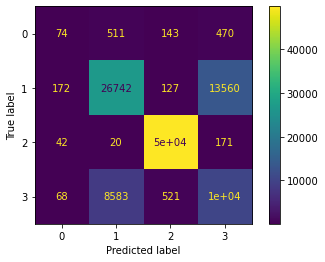

In [207]:
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix).plot()

In [211]:
model = models[0]
optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer.zero_grad()
for i in tqdm.tqdm(range(100)):
    for batch_idx, (X, y) in enumerate(train_dataloader):
        y_hat = model(X)
        loss = criterion(y_hat, y.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

100%|██████████| 100/100 [21:05<00:00, 12.65s/it]


In [212]:
for val_x, val_y in val_dataloader:
    print(nn.eval(models[0], val_x, val_y))

86.0294189453125


In [213]:
y_hat = torch.argmax(models[0](val_x), dim=1).numpy()

In [214]:
conf_matrix = sklearn.metrics.confusion_matrix(val_y, y_hat)


In [215]:
conf_matrix

array([[   49,   849,    85,   215],
       [    4, 38189,    15,  2393],
       [   14,    16, 49738,   347],
       [   11, 11394,   230,  7921]])

In [216]:
sklearn.metrics.fbeta_score(val_y.numpy(), y_hat, beta=2, average=None, zero_division=0)

array([0.05030801, 0.89707872, 0.99266349, 0.44450056])

In [245]:
df = df.sort_values(by='mean_recall', ascending=False)

In [221]:
df['value'] /= 4

In [249]:
study.trials_dataframe()['user_attrs_overall recall']

0                                   [0.0, 0.0, 4.0, 0.0]
1       [0.0, 2.321774558623811, 3.997142254174846, 0.0]
2                                   [0.0, 0.0, 4.0, 0.0]
3      [0.0, 1.2443246009408153, 3.9920091174617043, ...
4      [0.0, 2.0513354459031232, 3.999103944393326, 0...
                             ...                        
147    [0.007733333333333333, 1.6384317121656466, 3.9...
148    [0.018000000000000002, 1.639774046883303, 3.98...
149    [0.09533502334889926, 1.2765760623536129, 3.97...
150    [0.08547191460973982, 1.609628594485012, 3.973...
151    [0.0, 0.5445509477040565, 0.9992159623661936, ...
Name: user_attrs_overall recall, Length: 152, dtype: object

In [227]:
accs = []
recalls = []
fscores = []
for i in range(5):
    params = df.iloc[i].to_numpy()
    lr = params[8]
    first_layer = params[7]
    second_layer = params[9]
    models = []
    for i in range(4):
        models.append(nn.network(first_layer, second_layer))
    for m, (X_train, y_train, X_val, y_val) in enumerate(data.kfold_data):
        model = models[m] 
        optimizer = optim.Adam(model.parameters(), lr=lr)
        train_dataloader = nn.load_data(X_train, y_train)
        val_dataloader = nn.load_data(X_val, y_val, len(y_val), train=False)
        optimizer.zero_grad()
        for i in tqdm.tqdm(range(20)):
            for batch_idx, (X, y) in enumerate(train_dataloader):
                model.train()
                y_hat = model(X)
                loss = criterion(y_hat, y.long())
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
        for val_x, val_y in val_dataloader:
            accs.append(nn.eval(model, val_x, val_y))
            y_hat = model(val_x)
            fscores.append(sklearn.metrics.fbeta_score(val_y.numpy(), torch.argmax(y_hat,dim=1).numpy(), beta=2, average=None, zero_division=0))
            recalls.append(sklearn.metrics.recall_score(val_y.numpy(), torch.argmax(y_hat,dim=1).numpy(), average=None, zero_division=0))

100%|██████████| 20/20 [03:01<00:00,  9.09s/it]


In [241]:
accs_ = []
fscores_ = []
recalls_ = []
for i in range(0,20, 4):
    fscores_.append(np.mean(fscores[i:i+4], axis=0))
    recalls_.append(np.mean(recalls[i:i+4], axis=0))
    accs_.append(np.mean(accs[i:i+4]))

In [242]:
accs_

[65.32691860198975,
 61.68578052520752,
 59.90681076049805,
 67.86251449584961,
 70.0085563659668]

In [243]:
recalls_

[array([0.03500289, 0.43695259, 0.99453567, 0.26971317]),
 array([0.02533678, 0.25153522, 0.99383963, 0.44925894]),
 array([0.01066667, 0.39212608, 0.99641579, 0.05141823]),
 array([0.01183834, 0.51419096, 0.99331159, 0.25830297]),
 array([0.029337  , 0.55216801, 0.9933956 , 0.30025585])]

In [244]:
fscores_

[array([0.03725332, 0.46231203, 0.92267459, 0.27873314]),
 array([0.03085351, 0.28623329, 0.90853957, 0.40473031]),
 array([0.01281638, 0.41272994, 0.88000041, 0.06024604]),
 array([0.01455276, 0.53946516, 0.9304305 , 0.25943512]),
 array([0.03556886, 0.57037608, 0.93633104, 0.31464629])]

In [263]:
from sklearn.feature_selection import *

In [273]:
mutual_info_classif(data.data['Case-Fatality_Ratio'].to_numpy().reshape(-1,1), data.data['outcome'].to_numpy())

array([0.6925952])

In [259]:
data.data

,age,sex,date_confirmation,outcome,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,confirmed_day,in_contact,transformed_Combined_Key,transformed_sex
0,43.025039,unknown,2020-04-15 00:00:00,1,22.694884,71.590923,11.698043,8.097426,11.522618,9.685083,"Gujarat, India",5.238571,2.730687,106.0,0.0,169.0,2.0
1,94.000000,female,2020-04-15 00:00:00,2,-11.766533,-76.604498,12.763306,9.547455,0.000000,12.722357,"Lima, Peru",8.097181,4.012120,106.0,0.0,238.0,0.0
2,40.594874,unknown,2020-05-22 00:00:00,1,22.694884,71.590923,11.698043,8.097426,11.522618,9.685083,"Gujarat, India",5.238571,2.730687,143.0,0.0,169.0,2.0
3,29.000000,female,2020-04-28 00:00:00,2,-14.235097,-75.574821,10.137690,7.343426,0.000000,10.074580,"Ica, Peru",7.860217,6.115990,119.0,0.0,191.0,0.0
4,41.261196,unknown,2020-06-01 00:00:00,1,28.646519,77.108980,12.383499,8.498418,12.214393,10.381273,"Delhi, India",7.151806,2.054617,153.0,0.0,116.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557344,0.000000,male,2020-05-13 00:00:00,2,-38.416100,-63.616700,13.342196,9.457122,13.077527,11.790996,Argentina,7.228607,2.054632,134.0,0.0,26.0,1.0
557345,45.000000,male,2020-05-23 00:00:00,2,-11.005234,-76.157591,13.536341,10.350830,0.000000,13.494105,Peru,7.748647,4.135709,144.0,0.0,352.0,1.0
557346,39.000000,female,2020-05-19 00:00:00,2,-11.005234,-76.157591,13.536341,10.350830,0.000000,13.494105,Peru,7.748647,4.135709,140.0,0.0,352.0,0.0
557347,66.000000,female,2020-05-29 00:00:00,2,6.025173,-74.652093,13.538964,10.087433,13.349794,11.577533,Colombia,7.359814,3.169708,150.0,0.0,102.0,0.0
